# K-Nearest Neighbors Classification

José Julián Camacho Hernández

Leonardo Guillén Fernández

### 3. Teoría

**1. Indique cual es costo de “Training” y de test del algoritmo KNN**

Es costoso porque ocupa gran cantidad de memoria, y además de que es finita, su acceso es caro. Adicionalmente, su ejecución es muy costosa debido a que debe comparar la distancia de cada nueva instancia con otras del set de datos.
En términos de Big O, el costo de entrenamiento es de O(1), ya que se almacenan una sola vez. Por otro lado, el costo de test es de O(N*D), donde N es la cantidad de feature vectors y D es la cantidad de features en cada uno. Si D = N, entonces el costo será de O(N^2).

**2. Explique por qué se dice que instance learning es un algoritmo por fuerza bruta o perezoso.**

Se dice que es un algoritmo perezoso o por fuerza bruta ya que no hay un entrenamiento con lógica, sino que simplemente se compara con el resto de la base de datos a través de la busca de una similitud o de distancia, y se enfoca en encontrar el caso más cercano.

**3. Indique cuántas comparaciones se deben realizar en la etapa de testeo (asumiendo el peor de los casos).**

En la etapa de testeo, en el peor de los casos se debe comparar cada nueva instancia del conjunto de prueba con todas y cada una de las del conjunto de training, por lo que para una se deben hacer N comparaciones, donde N es la cantidad de instancias en el conjunto de training. Para una etapa de testeo con M instancias en el conjunto de prueba, se deben realizar entonces M*N comparaciones.

**4. Investigue alguna modificación que se ha realizado al algoritmo original del KNN.**

inc-k-MSN es una de las modificaciones del algoritmo original del KNN, esta nueva modificación no almacena el conjunto de datos de entrenamiento en la memoria provincial, solamente guarda el objeto a clasificar, así como los k vecinos más similares calculados hasta el paso.


## 4.1 Distancia entre elementos

In [243]:
import numpy as np


In [244]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='distance'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 2

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        #print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]
            #print("Sorted_neighs: ", sorted_neigh)
            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True) #Obtener distancias y vecinos
            neighbors = []
            neighbors = [self.y_train[i] for i in neigh_ind] #Obtener los tipos segun los indices de vecinos
            
            y_pred = []
            for i in range(len(neighbors)):
                distances = {}                              #Diccionario para guardar distancias por tipo
                for j in range(len(neighbors[i])):
                    neighbor_type = neighbors[i][j]         #Obtener tipo de vecino
                    distance = dist[i][j]                   #Obtener distancia a dicho vecino
                    if neighbor_type in distances:          #Guardar en el diccionario
                        distances[neighbor_type].append(distance)
                    else:
                        distances[neighbor_type] = [distance]
                
                average_distances = {}                      #Diccionario para guardar promedio de distancias
                for neighbor_type in distances:
                    average_distance = np.mean(distances[neighbor_type])
                    average_distances[neighbor_type] = average_distance

                #Obtener minima distancia promedio 
                min_distance_type = min(average_distances, key=average_distances.get)
                #print("El tipo {} tiene la mínima distacia promedio y es: {}".format(min_distance_type, average_distances[min_distance_type]))
                y_pred.append(min_distance_type)

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


El algoritmo implementado se detalla en el siguiente diagrama:

![alt text](diagramaKNN.png)

Se observa un ejemplo para K = 5. En este, en primer lugar se obtienen los 5 vecinos más cercanos y se calculan sus distancias respecto al nuevo objeto. El algoritmo se encarga de promediar la distancia de cada tipo de objeto respecto al nuevo y selecciona el tipo de objeto que tenga la menor distancia, en lugar de seleccionar el tipo de objeto con mayor cantidad de instancias en los 5 vecinos más cercanos.
Por lo tanto, en el ejemplo se selecciona el amarillo en lugar del rojo, ya que a pesar de que el rojo cuenta con la mayoría, el amarillo tiene una distancia promedio menor.

En el algoritmo, se toman las distancias e índices de los vecinos de la función kneighbors, y se construye una nueva lista con los tipo de datos en esos índices. Posteriormente, se predice para cada conjunto de k vecinos más cercanos. Para esto, como en el ejemplo, se guarda en un diccionario las distancias para cada tipo de datos en los k. Luego, en otro diccionario se guarda el promedio de las distancias para cada tipo de dato. Finalmente, se obtiene el mínimo valor en el diccionario y se obtiene de ahí el tipo que será la predicción. 

# Iris dataset (Observations/Treatments)

In [245]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import time
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)

X = dataset.data
y = dataset.target


In [246]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 4.1.2

Prueba del algoritmo de distancia y comparación con sklearn

In [247]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

#Valores de k vecinos más cercanos para clasificación
k_values = [2,3,4,5,6,7,9,11]
distance_accuracy_list = []
sklearn_accuracy_list = []
distance_time_list = []
sklearn_time_list = []

for k in k_values:
    #Instanciar clasificadores
    distance_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
    sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    
    #Tomar tiempos de clasificación
    start_time = time.time()
    distance_accuracy, y_pred, y_test = distance_classifier.score(X_test, y_test)
    end_time = time.time()
    time_taken_distance_classifier = end_time - start_time
    distance_time_list.append(time_taken_distance_classifier)

    start_time = time.time()
    sklearn_accuracy = sklearn_classifier.score(X_test, y_test)
    end_time = time.time()
    time_taken_sklearn_classifier = end_time - start_time
    sklearn_time_list.append(time_taken_sklearn_classifier)

    distance_accuracy_list.append(distance_accuracy)
    sklearn_accuracy_list.append(sklearn_accuracy)

print("Resultados obtenidos: ", y_pred[:20])
print("Resultados esperados: ", y_test[:20], "\n")

print("Valores de precisión obtenidos")
accuracy_data = {
  "Our Distance Implementation": distance_accuracy_list,
  "Sklearn\'s Implementation": sklearn_accuracy_list
}
pd.DataFrame(accuracy_data, index = k_values)

Resultados obtenidos:  [0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1]
Resultados esperados:  [0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1] 

Valores de precisión obtenidos


,Our Distance Implementation,Sklearn's Implementation
2,0.955556,0.955556
3,0.955556,0.955556
4,0.911111,0.955556
5,0.911111,0.955556
6,0.911111,0.955556
7,0.888889,0.955556
9,0.955556,0.955556
11,0.955556,0.955556


In [248]:
print("Tiempos de ejecución obtenidos")
time_data = {
  "Our Implementation": distance_time_list,
  "Sklearn\'s Implementation": sklearn_time_list
}
pd.DataFrame(time_data, index = k_values)

Tiempos de ejecución obtenidos


,Our Implementation,Sklearn's Implementation
2,0.005275,0.002899
3,0.003103,0.003542
4,0.004230,0.002545
5,0.004552,0.003702
6,0.004373,0.002585
7,0.004273,0.003555
9,0.004441,0.002301
11,0.004012,0.002410


### 4.1.3

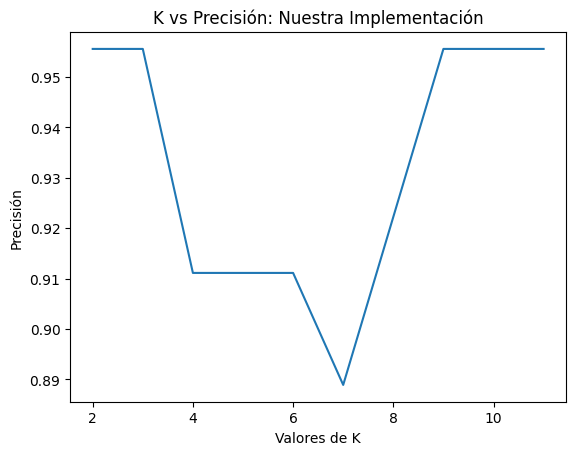

In [249]:
plt.plot(k_values, distance_accuracy_list)

plt.title("K vs Precisión: Nuestra Implementación")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

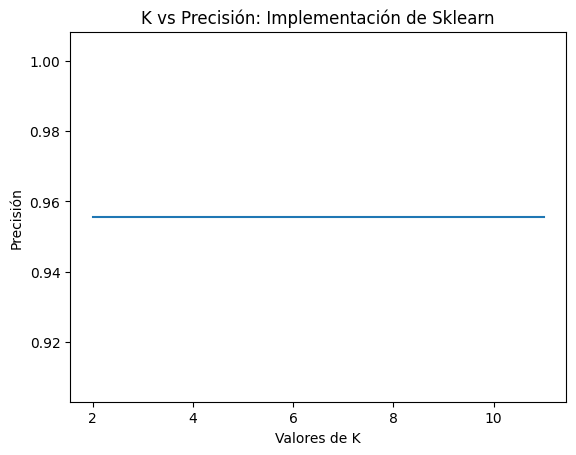

In [250]:
plt.plot(k_values, sklearn_accuracy_list)

plt.title("K vs Precisión: Implementación de Sklearn")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

#### Discusión

En la tabla de comparación de precisión, es posible observar que el algoritmo implementado consigue la misma precisión que Sklearn para ciertos valores de k. En la gráfica, se observa que la precisión baja para k=4 hasta k=7 donde obtiene la más baja, posteriormente vuelve a igualar a Sklearn, la cual obtiene un valor constante de precisión para todos los valores de k.

Respecto a los tiempos de ejecución, se puede anotar que son muy similares, por lo que nuestra implementación no es significativamente ineficiente respecto a la de Sklearn.

# 4.2. Digits dataset

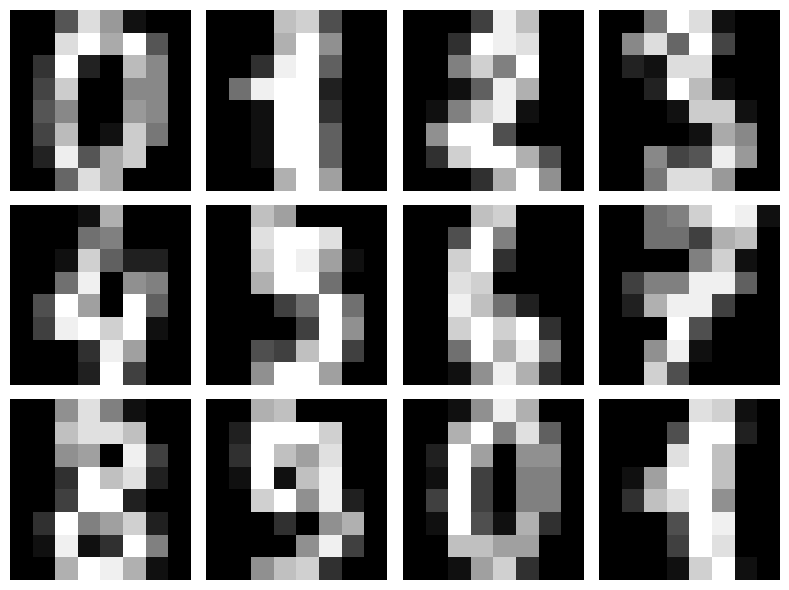

In [251]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits (n_class =10)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 6))
plt.gray()

#Mostrar imagenes en cuadrícula
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
X = digits.data
y = digits.target

In [252]:
print('El set tiene: ', X.shape[0], 'datos')
print('El cada feature vector tiene: ', X.shape[1], 'features')

El set tiene:  1797 datos
El cada feature vector tiene:  64 features


### 4.2.5
Comparación del método uniforme con el método de distancias implementado por el grupo

In [253]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

#Reshape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Separar el set de datos para un 25% de testing
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=45)

#Valores de k vecinos más cercanos por probar
k_values = [2,3,5,7,8,10,11]
uniform_accuracy_list = []
distance_accuracy_list = []

for k in k_values:
    #Instanciar clasificadores uniforme y de distancias
    uniform_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k,weights='uniform')
    distance_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k,weights='distance')
    
    #Clasificar y calcular precisiones
    uniform_accuracy, y_pred, y_test = uniform_classifier.score(X_test, y_test)
    distance_accuracy, y_pred, y_test = distance_classifier.score(X_test, y_test)

    uniform_accuracy_list.append(uniform_accuracy)
    distance_accuracy_list.append(distance_accuracy)

print("Resultados obtenidos: ", y_pred[:20])
print("Resultados esperados: ", y_test[:20], "\n")

print("Valores de precisión obtenidos")


accuracy_data = {
  "Uniform Implementation": uniform_accuracy_list,
  "Distance Implementation": distance_accuracy_list
}
pd.DataFrame(accuracy_data, index = k_values)

Resultados obtenidos:  [0, 8, 4, 4, 0, 5, 1, 3, 8, 9, 4, 5, 0, 0, 6, 4, 6, 2, 2, 8]
Resultados esperados:  [0 8 4 4 0 5 1 3 9 9 4 5 0 0 6 4 6 2 2 8] 

Valores de precisión obtenidos


,Uniform Implementation,Distance Implementation
2,0.982222,0.984444
3,0.982222,0.986667
5,0.977778,0.980000
7,0.968889,0.982222
8,0.968889,0.980000
10,0.964444,0.968889
11,0.966667,0.971111


### 4.2.6-7
Comparación del método de distancias implementado por el grupo con el de sklearn

In [264]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

#Reshape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Importar SKLearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=45)

#Valores de k vecinos más cercanos de prueba
k_values = [2,3,5,7,8,10,11]
distance_accuracy_list = []
sklearn_accuracy_list = []

for k in k_values:
    distance_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
    sklearn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train, y_train)

    distance_accuracy, y_pred, y_test = distance_classifier.score(X_test, y_test)
    sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

    distance_accuracy_list.append(distance_accuracy)
    sklearn_accuracy_list.append(sklearn_accuracy)

print("Resultados obtenidos: ", y_pred[:20])
print("Resultados esperados: ", y_test[:20], "\n")

print("Valores de precisión obtenidos")

accuracy_data = {
  "Our Distance Implementation": distance_accuracy_list,
  "Sklearn\'s Implementation": sklearn_accuracy_list
}
pd.DataFrame(accuracy_data, index = k_values)

Resultados obtenidos:  [0, 8, 4, 4, 0, 5, 1, 3, 8, 9, 4, 5, 0, 0, 6, 4, 6, 2, 2, 8]
Resultados esperados:  [0 8 4 4 0 5 1 3 9 9 4 5 0 0 6 4 6 2 2 8] 

Valores de precisión obtenidos


,Our Distance Implementation,Sklearn's Implementation
2,0.984444,0.982222
3,0.986667,0.982222
5,0.980000,0.977778
7,0.982222,0.968889
8,0.980000,0.968889
10,0.968889,0.964444
11,0.971111,0.966667


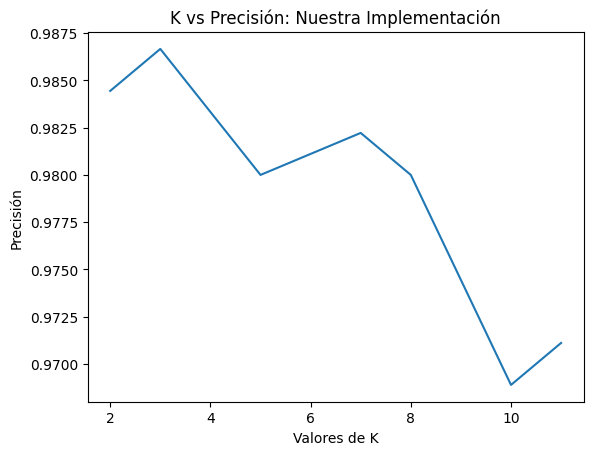

In [255]:
plt.plot(k_values, our_accuracy_list)

plt.title("K vs Precisión: Nuestra Implementación")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

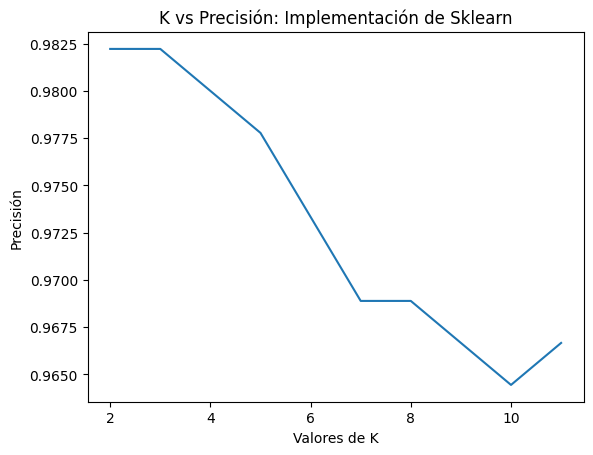

In [256]:
plt.plot(k_values, sklearn_accuracy_list)

plt.title("K vs Precisión: Implementación de Sklearn")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

### 4.2.8

Uso del modelo para clasificar imágenes de dígitos escritos a mano

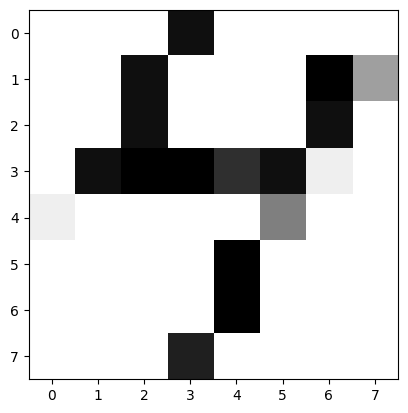

Datos de entrada (imagen) en 8x8:
 [[ 0  0  0 15  0  0  0  0]
 [ 0  0 15  0  0  0 16  6]
 [ 0  0 15  0  0  0 15  0]
 [ 0 15 16 16 13 15  1  0]
 [ 1  0  0  0  0  8  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 14  0  0  0  0]]
Resultado esperado:  4
La clasificación según nuestro modelo de distancia es:  [4]
Por lo tanto, el modelo acertó en esta clasificación


In [268]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Cargar la imagen
img = plt.imread('./numeros/4b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int)
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("Datos de entrada (imagen) en 8x8:\n",a)

#Instanciar clasificador y predecir
distance_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=3)
predicted = distance_classifier.predict(a.flatten().reshape(1, -1))
expected = 4

print("Resultado esperado: ", expected)
print("La clasificación según nuestro modelo de distancia es: ", predicted)

if (predicted[0] == expected):
    print("Por lo tanto, el modelo acertó en esta clasificación")
else:
    print("Por lo tanto, el modelo falló en esta clasificación")

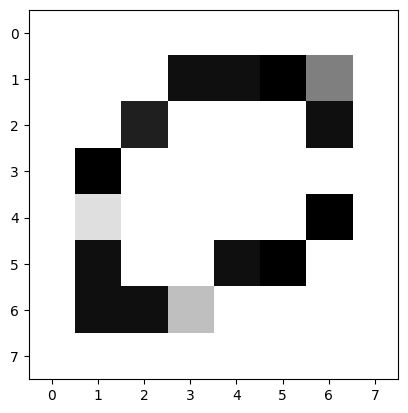

Datos de entrada (imagen) en 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0 15 15 16  8  0]
 [ 0  0 14  0  0  0 15  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  2  0  0  0  0 16  0]
 [ 0 15  0  0 15 16  0  0]
 [ 0 15 15  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Resultado esperado:  0
La clasificación según nuestro modelo de distancia es:  [0]
Por lo tanto, el modelo acertó en esta clasificación


In [218]:
#Cargar segunda imagen
img = plt.imread('./numeros/0b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int)
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("Datos de entrada (imagen) en 8x8:\n",a)

#Predecir
predicted = distance_classifier.predict(a.flatten().reshape(1, -1))
expected = 0

print("Resultado esperado: ", expected)
print("La clasificación según nuestro modelo de distancia es: ", predicted)

if (predicted[0] == expected):
    print("Por lo tanto, el modelo acertó en esta clasificación")
else:
    print("Por lo tanto, el modelo falló en esta clasificación")

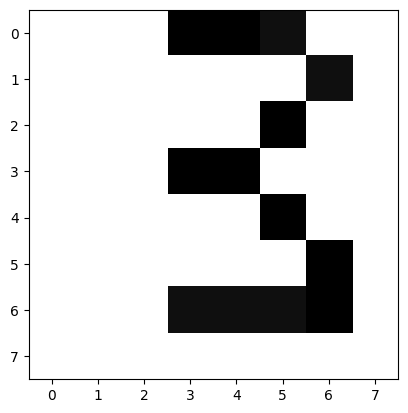

Datos de entrada (imagen) en 8x8:
 [[ 0  0  0 16 16 15  0  0]
 [ 0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0 16 16  0  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0 15 15 15 16  0]
 [ 0  0  0  0  0  0  0  0]]
Resultado esperado:  3
La clasificación según nuestro modelo de distancia es:  [3]
Por lo tanto, el modelo acertó en esta clasificación


In [214]:
#Cargar segunda imagen
img = plt.imread('./numeros/3b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int)
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("Datos de entrada (imagen) en 8x8:\n",a)

#Predecir
predicted = distance_classifier.predict(a.flatten().reshape(1, -1))
expected = 3

print("Resultado esperado: ", expected)
print("La clasificación según nuestro modelo de distancia es: ", predicted)

if (predicted[0] == expected):
    print("Por lo tanto, el modelo acertó en esta clasificación")
else:
    print("Por lo tanto, el modelo falló en esta clasificación")

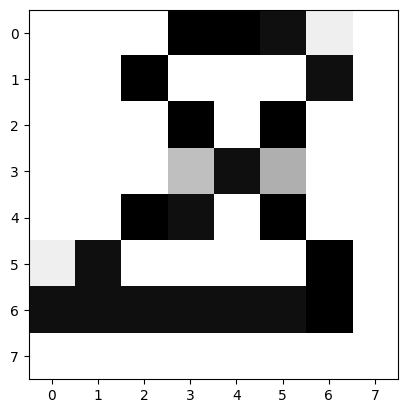

Datos de entrada (imagen) en 8x8:
 [[ 0  0  0 16 16 15  1  0]
 [ 0  0 16  0  0  0 15  0]
 [ 0  0  0 16  0 16  0  0]
 [ 0  0  0  4 15  5  0  0]
 [ 0  0 16 15  0 16  0  0]
 [ 1 15  0  0  0  0 16  0]
 [15 15 15 15 15 15 16  0]
 [ 0  0  0  0  0  0  0  0]]
Resultado esperado:  8
La clasificación según nuestro modelo de distancia es:  [3]
Por lo tanto, el modelo falló en esta clasificación


In [215]:
#Cargar cuarta imagen
img = plt.imread('./numeros/8b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int)
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("Datos de entrada (imagen) en 8x8:\n",a)

#Predecir
predicted = distance_classifier.predict(a.flatten().reshape(1, -1))
expected = 8

print("Resultado esperado: ", expected)
print("La clasificación según nuestro modelo de distancia es: ", predicted)

if (predicted[0] == expected):
    print("Por lo tanto, el modelo acertó en esta clasificación")
else:
    print("Por lo tanto, el modelo falló en esta clasificación")

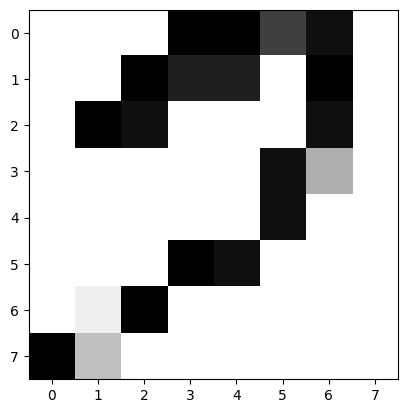

Datos de entrada (imagen) en 8x8:
 [[ 0  0  0 16 16 12 15  0]
 [ 0  0 16 14 14  0 16  0]
 [ 0 16 15  0  0  0 15  0]
 [ 0  0  0  0  0 15  5  0]
 [ 0  0  0  0  0 15  0  0]
 [ 0  0  0 16 15  0  0  0]
 [ 0  1 16  0  0  0  0  0]
 [16  4  0  0  0  0  0  0]]
Resultado esperado:  7
La clasificación según nuestro modelo de distancia es:  [7]
Por lo tanto, el modelo acertó en esta clasificación


In [216]:
#Cargar segunda imagen
img = plt.imread('./numeros/7b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int)
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("Datos de entrada (imagen) en 8x8:\n",a)

#Predecir
predicted = distance_classifier.predict(a.flatten().reshape(1, -1))
expected = 7

print("Resultado esperado: ", expected)
print("La clasificación según nuestro modelo de distancia es: ", predicted)

if (predicted[0] == expected):
    print("Por lo tanto, el modelo acertó en esta clasificación")
else:
    print("Por lo tanto, el modelo falló en esta clasificación")